# 4. Classify MNIST images with TensorFlow

In this section, we will see how to recognize hand-written digits with a simple neural network running on TensorFlow.
This is an adaptation of [TensorFlow Tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html).

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.04.53%20PM.png)

### Clear all Cells

Before starting, select `Clear all Cells` from the `Clear` menu at the top of Datalab, to clear all the cell result in this section.

## 4-1. Classyfing images as n-dimensioinal data

So far, we have learned how to classifies datapoints in two dimensional spaces, such as a geolocation with latitude and logitude. In this section, we will extend the same technique to classify datapoints in n-dimensional space. 

What do you mean by **"classifing datapoints in n-dimensional space"**? As an example, we will use images of handwritten text called [MNIST](http://yann.lecun.com/exdb/mnist/) dataset as the datapoints in n-dimensional space. MNIST is one of the most popular datasets used for learning neural network technology. It's like a **hello world** in neural network.

### Loading MNIST training data

At first, let's download the MNIST dataset. **Run the cell below**.

In [45]:
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print (mnist.train.images.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)


### 55,000 training Images

The variable `mnist` holds 55,000 gray scale images of handwritten text. Each image has 784 values that represent each pixel in an image. So it looks like this:

![mnist.train.xs](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.17.39%20AM.png)

### Single image = 784 real values

Each handwritten text image has 784 values of pixels from 0.0 (white) 1.0 (black). 

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.06.25%20PM.png)

For example, if you print the values of 5th images out of the 55,000 images, it looks like this: 

In [46]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)
print(sample_img)

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

You can also plot the image with Matplotlib.

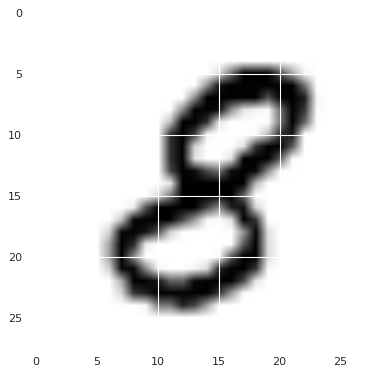

In [47]:
import matplotlib.pyplot as plt
plt.imshow(sample_img).set_cmap('Greys')

### Training Labels

The MNISt dataset also contains the labels for each image for training.

![mnist.train.ys](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.21.20%20AM.png)

**Run the cell below** to check the shape and the values in the label array.

In [48]:
# check MNIST labels shape
print(mnist.train.labels.shape)

# show MNIST label data
print(mnist.train.labels[5])

(55000, 10)
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


---
### Lab: Use Embedding Projector to see how N-dimensional space look like

If you have 784 values in an array or a vector, it is called "784 dimensional vector" in the context of machine learning. It's a vector in 784 dimensional space.

If you have X and Y values in 2D space, or X, Y and Z in 3D space, it's really easy for humans to imagine how they look like. For example, if you have three values in a 3D vector that represents "you like movies so much, you also like actors, and you like music a little", you can draw a vector in 3D space like this.

![](images/3d-vector.png)

Meanwhile, we can't imagine how high dimensional spaces and vectors look like, if it's higher than 3D. You can't draw a picture in your head what kind of shape a vector in 784 dimensional space would have.

But there's a great tool to visualize that. Open [TensorFlow Embedding Projector](http://projector.tensorflow.org/) and follow the steps below.

- Select `MNIST images` as DATA at the top left
- Select `label` from the `Color by` menu
- Select `T-SNE` tab at the middle of left navigation

You will see the MNIST images would be slowly grouped into 10 groups for each digits.

<br/>
![](images/MNIST.png)
<br/>

What's happening here? The tool uses an algorithm called [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) to do [dimensionarity reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction). That means, you can "cast a shadow" of the n-dimensional space into 3D or 2D space. So, what you are watching above is **a shadow** of MNIST image vectors in 784 dimensional space, casted on 3D space.

---
## 4-2. Defining a Neural Network

### Single neuron can recognize a single digit

So, an image in MNIST dataset is a 784 dimensional vector. And you can use a single neuron to classify each vector is an image of "1" or not. To do that you can do the same thing we have done with latitude and longitude: mutiplies the 784 values with weights and checks if the sum exceeds a certain threthold.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.08.38%20PM.png)

### Define a neural network as a graph

To classify an image to 10 digits, we need a single layer neural network (Perception) with 10 neurons. It would look like this. Here we have inputs from X1 to X784, multiplied with the bunch of weights to get 10 summation results, added to the 10 biases that work as thresholds. We'll see what is "softmax" later.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.26%20AM.png)

### Or, as a matrix operation:

There is a great tool in Math to calculate this neural network graph with just one line. That is called [Dot product](https://en.wikipedia.org/wiki/Dot_product) between matrix and vector.

<br/>
![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.40%20AM.png)
<br/>

So, if you write the weights as **W**, biases as **b**, and the input values as **x**, you can define a single layer neural network as the following formula.

<br/>
$${\Huge y=softmax(Wx + b)}$$
<br/>

This is so simple!

### Or, as a TensorFlow graph:

In TensorFlow, there is so-called **Low level API** that allows you to write the vector and matrix operations above by using **Tensor**. It looks like this. **Run the cell below** to define the network. 

In [49]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784]) # a placeholder for inputting the image 
W = tf.Variable(tf.zeros([784, 10])) # weights
b = tf.Variable(tf.zeros([10])) # biases
y = tf.nn.softmax(tf.matmul(x, W) + b)
y

<tf.Tensor 'Softmax_7:0' shape=(?, 10) dtype=float32>

**Tensor** is just an array. In Physics, they use the word Tensor for the complex math calculations, but you can forget about it in the context of machine learning. Tensor in TensorFlow is just a multi-dimensional array that can hold any high or low dimensional vectors and matrices of the input data, weights, biases and etc.

So, the word **TensorFlow** means that you can use the Low level API to define **a flow of calculations between vectors and matrices**. In this case, we define the following computation flow.

- At line 3, it calls `tf.placeholder` method to define a Tensor `x` for accepting any number of 784 dimensional vectors. This will be used to receive the training image data
- At line 4, it calls `tf.Variable` method to define a Variable `W` for holding the weight matrix that has 784 x 10 values
- At line 5, it calls `tf.Variable` method to define a Variable `b` for holding the bias vector that has 10 values
- At line 6, it calls `tf.matmul` method to define a dot product between `x` and `W`, and calls `tf.nn.softmax` method to define a **softmax** of the value. The result Tensor is named as `y`

### The trained weights will be "filters"

By training the network with the 55,000 images, you will have patterns of weights like the following. The blue area has **positive** weights, and the red area has **negative** weights.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.14%20AM.png)

You can see that the blue and red patterns would work as "filters" for looking at each image. The network applies those filters on each image, and see the matching. If an image matches well with a filter (weights) for "8" and the summation exceeds the threashold (bias) for "8", the network believes the images must be an image of "8".

### What is Softmax?

So, what does the softmax method does? Softmax is a function that converts an array of values into an array of **probabilities** (0 - 1.0).

<br/>
<br/>
<br/>
$${\Huge softmax(n) = \frac{\exp n_i}{\sum \exp n_i}}$$
<br/>
<br/>
<br/>

Let's see how it works by using 10 random values. **Run the cell below** to create 10 random values.

<Container object of 10 artists>

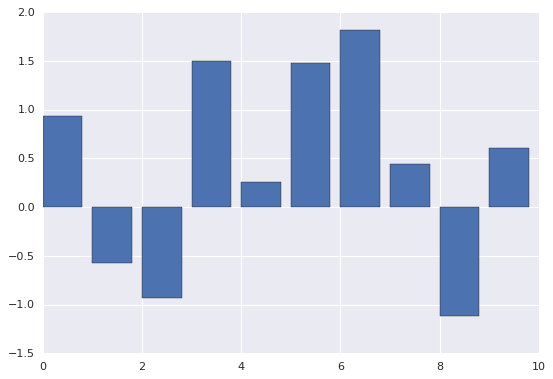

In [50]:
import numpy as np
i = np.arange(0, 10)
n = np.random.randn(10)
plt.bar(i, n)

Then, **run the cell below** to calculate the softmax values for those random values.

The sum of softmax: 1.0


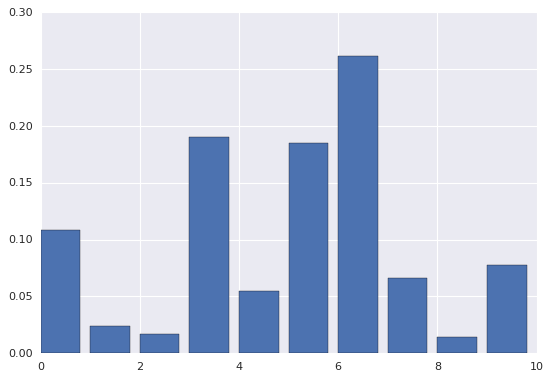

In [51]:
def softmax(n):
  return np.exp(n) / np.sum(np.exp(n))

s = softmax(n)
plt.bar(i, s)
print('The sum of softmax: ' + str(np.sum(s)))

As you can see, softmax normalizes the original values to compare them as probabilities from 0.0 to 1.0, and the summation of all values will be 1.0. So you can choose a single value closest to 1.0 as the final answer from neural network.

## 4-3. Defining the Train Step

Next, you need to define how to train the network. **Run the cell below**.

In [52]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10]) # the training labels
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent_3' type=NoOp>

- At line 2, it calls `tf.placeholder` method to define a Tensor `_y` for accepting any number of 10 dimensional vectors. This will be used to receive the training labels
- At line 3, it calls `tf.log` and `tf.reduce_sum` to define a **cross entropy** calculation on the softmax result from the network. The result Tensor is named as `cross_entropy`
- At line 4, it calls `tf.train.GradientsDescentOptimizer.minimize` method to use **Gradient Descent** algorithm to train the network

---
### Lab: What is a loss function and Cross Entropy?

When you train your model in machine learning, you define a [loss function](https://en.wikipedia.org/wiki/Loss_function) for evaluating the accuracy the model while you are training it. In neural network, one of the popular loss function is [Cross Entropy](https://en.wikipedia.org/wiki/Cross_entropy) as follows.

<br/>
<br/>
<br/>
$${\Huge cross\_entropy (x, y) = - \sum   y_{i}  log(x_{i})}$$
<br/>
<br/>
<br/>

The formula simply means, it returns **higher value** when you have many **wrong answers**, and **lower value** when you have many **correct answers**. 

Let's see how it works in practice. **Run the cell below** to define a label.

<Container object of 10 artists>

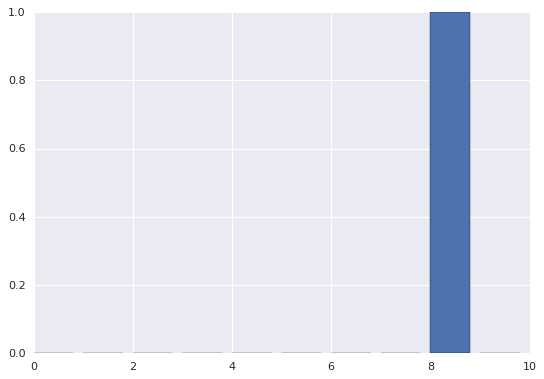

In [53]:
# label
label = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
plt.bar(i, label)

Then, let's calculate a cross entropy value on the softmax values calculated at the last lab. **Run the cell below**.

In [54]:
def cross_entropy(x, _y):
  return -np.sum(_y * np.log(x))
cross_entropy

<function __main__.cross_entropy>

This defines the method `cross_entropy`. You can pass the output from the softmax as parameter `x`, and pass the labels as `_y`. So that the method calculates cross entropy value.

Now, **run the cell below** to emulate what would happen during the training.

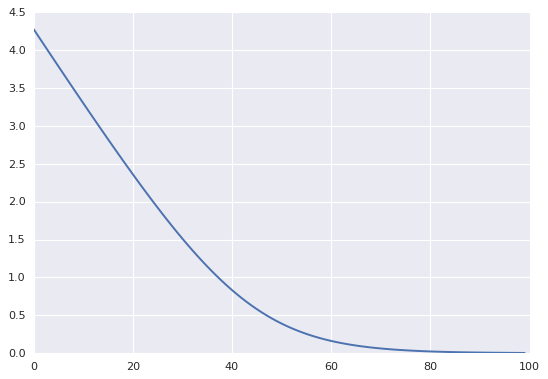

In [55]:
# simulate the training
cross_ent = []
for i in range(0, 100):
  cross_ent.append(cross_entropy(softmax(n), label))
  n[8] += 0.1
plt.plot(cross_ent)

In the code above, it manually increase the value of `n[8]` with the loop. It's faking a training to see how the cross entropy value changes as training proceeds. As you can see on the graph, cross entropy function has **a steep curb** at the initial phase of the training, means it returns much bigger value if the answer from the network is wrong. That's the reason why many people love it as a loss function to **make the neural network training faster**.

---
### Create a `Session` in TensorFlow

Now, let's start the training of our network. First, you need a `Session` as a runtime for your TensorFlow graph. **Run the cell below** to define it.

In [58]:
# supress warning messages
tf.logging.set_verbosity(tf.logging.ERROR)

# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
sess

At line 6, it creates a new `Session`. Session represents a runtime of TensorFlow where you can execute various TensorFlow operations for training, testing and etc. With TensorFlow Low level API, you follow the steps below to do training.

- Define a neural network
- Define a train step with a loss function and an optimization algorithm
- Create a `Session` for training the model
- Run the training with the `Session`

Why we need to use this tedious procedures? Because TensorFlow is designed to be **scalable and portable**. You can specify different kinds of `Sessions` that represent the runtime on your local laptop, GPUs on a PC, or CPU/GPU/[TPU](https://cloudplatform.googleblog.com/2016/05/Google-supercharges-machine-learning-tasks-with-custom-chip.html) on the cloud. So, the whole design - defining a computation graph and pass it on a runtime - allows the code independent from a particular runtime. 

### Training with mini batches

Next, start training. In this case we will use [Stochastic Gradient Decent (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). That means, when you apploy the Gradient Descent algorithm (defined with the tf.Operation `train_step`) to the training data, you will randomly pick (so it is called "stochastic") 100 samples out of 55,000 images and labels. This 100 random sample is called **mini batch**. SGD allows you to have the training much faster and efficient than applying gradient decent on entire training data. **Run the cell below** to try this in practice.

In [59]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

print('Training Finished.')

Training Finished.


- At line 2, it randomly picks 100 sample images and labels as a mini batch
- At line 3, it calls `Session.run` method to pass the train step definition and the mini batch.
- At line 1, it repeats the training with a mini batch for 1000 times. With each mini batch, the optimization algorithm moves weights and biases toward the direction of less cross entropy value

This is what was happening inside the `DNNClassifier` we have used in the section 2. You can define your own network and algorithm with L ow level API for sophisticated or complex applications.

### Let's test it!

At last, checking the accuracy of the network you have just trained. **Run the cell below** to do that.

In [61]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
calc_accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
accuracy = sess.run(calc_accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print('Accuracy: ' + str(accuracy))

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

- At line 3, it passes the testing images to Tensor `x` and testing labels to Tensor `y`, and calls `Session.run` method to run the test calculation flow
- At line 1, it calls `tf.argmax` method on `y` to pick the prediction results from the network, and `_y` to pick the correct labels. The `tf.equal` method compares them and generate a list of boolean values
- At line 2, it takes a mean value of how many Trues found in the `calc_accuracy`. The accuracy value will be returned from the `Session.run` method at line 3

That's it! Now you have seen how TensorFlow works to use the single layer neural network model to classify the handwritten text.

---
### Lab: Try Deeper!

- Try modifying the code above to define your deep neural network with 3 (or more) layers, and see how it increase the accuracy

---
# Today We Learned

- **Single neuron** can take an image and recognize a digit
- **Matrix operation** (y = Wx + b) can define a neural network concisely
- **Softmax** converts the result to probabilities (0.0 - 1.0)
- **Cross Entropy** evaluates how much error the network makes (the loss function)
- **Gradient Decent** moves weights and biases toward the direction with less error
- **Mini Batch** trains the network with small batch of data

# What's Next

Congrats! This is the end of this codelab. If you want to learn more about the advanced techniques you can use with TensorFlow, you may check [Learn TensorFlow and deep learning, without a Ph. D](https://cloud.google.com/blog/big-data/2017/01/learn-tensorflow-and-deep-learning-without-a-phd) by Martin Gorner where you can learn the sophisticated algorithms such as Convolutional Neural Network and several optimization techniques to get better accuracy on image recognition.